<center><font size="+3">Introductory review of applied probabilistic inference</font></center>

# References

The following notes borrow heavily from and are *thoroughly* based on Michael Betancourt's developments that put forth a principled Bayesian workflow. The following references were integrated to produce this document:

* Betancourt, Michael (2019). Probabilistic Modeling and Statistical Inference. Retrieved from https://github.com/betanalpha/knitr_case_studies/tree/master/modeling_and_inference, commit b474ec.
* Betancourt, Michael (2020). Towards A Principled Bayesian Workflow (RStan). Retrieved from https://github.com/betanalpha/knitr_case_studies/tree/master/principled_bayesian_workflow, commit 23eb26.
* [betanalpha/knitr_case_studies](https://github.com/betanalpha/knitr_case_studies)
* [lstmemery/principled-bayesian-workflow-pymc3](https://github.com/lstmemery/principled-bayesian-workflow-pymc3)
* [bayespy documentation](https://github.com/bayespy/bayespy/blob/develop/doc/source/user_guide/quickstart.rst)
* [tikz-bayesnet](https://github.com/jluttine/tikz-bayesnet) library [technical report](https://github.com/jluttine/tikz-bayesnet/blob/master/dietz-techreport.pdf)

The implementation of the modelling and inference translated from [lstmemery's pymc3 implementation of Betancourt's principled Bayesian workflow](https://github.com/lstmemery/principled-bayesian-workflow-pymc3) to [numpyro](http://num.pyro.ai/en/stable/) is by [Du Phan](https://fehiepsi.github.io/).

# Setup

## Install libraries

In [1]:
# %run -i 'plotting.py'

In [ ]:
!apt-get install -y fonts-lmodern
!pip install -q arviz numpyro

## Add latin modern fonts

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [ ]:
fonts_path_ubuntu = "/usr/share/texmf/fonts/opentype/public/lm/"
# fonts_path_macos = "~/Library/Fonts/"
# fonts_path_arch = "/usr/share/fonts/OTF/"
matplotlib.font_manager.fontManager.addfont(fonts_path_ubuntu + "lmsans10-regular.otf")
matplotlib.font_manager.fontManager.addfont(fonts_path_ubuntu + "lmroman10-regular.otf")

## Set matplotlib to use latin modern fonts

In [ ]:
from IPython.display import set_matplotlib_formats
#%matplotlib inline
set_matplotlib_formats('svg') # use SVG backend to maintain vectorization
plt.style.use('default') #reset default parameters
# https://stackoverflow.com/a/3900167/446907
plt.rcParams.update({'font.size': 16,
                     'font.family': ['sans-serif'],
                     'font.serif': ['Latin Modern Roman'] + plt.rcParams['font.serif'],
                     'font.sans-serif': ['Latin Modern Sans'] + plt.rcParams['font.sans-serif']})

# Modeling process

## Observing the world through the lens of probability

### Systems, environments, and observations

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/inferential_config/observational_process/multiple_probes/multiple_probes.png" alt="Drawing" width="90%"/>
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/inferential_config/observational_process/multiple_observational_processes/multiple_observational_processes.png" alt="Drawing" width="90%"/></center>
</div>

### The space of observational models and the true data generating process

#### The observational model
* observation space: $Y$
* arbitrary points in the observation space: $y$
* explicitly realized observations from the observational process $\tilde{y}$
* data generating process: a probability distribution over the observation space
* space of all data generating processes: $\mathcal{P}$
* observational model vs model configuration space: the subspace, $\mathcal{S} \subset \mathcal{P}$, of data generating processes considered in any particular application
* parametrization: a map from a model configuration space $\mathcal{S}$ to a parameter space $\mathcal{\Theta}$ assigning to each model configuration $s \in \mathcal{S}$ a parameter $\theta \in \mathcal{\Theta}$
* probability density for an observational model: $\pi_{\mathcal{S}}(y; s)$ in general using the parametrization to assign $\pi_{\mathcal{S}}(y; \theta)$

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/small_world/small_world/small_world.png" alt="Drawing" width="45%"/>
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/small_world/small_world_one/small_world_one.png" alt="Drawing" width="45%"/>
</center>
</div>

#### The true data generating process
* true data generating process: $\pi^{\dagger}$ is the probability distribution that exactly captures the observational process in a given application

## The practical reality of model construction

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/small_world/small_world_two/small_world_two.png" alt="Drawing" width="75%"/></center>
</div>

## The process of inference

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/modeling_and_inference/figures/inferential_config/model_config/model_config5/model_config5.png" alt="Drawing" width="90%"/></center>
</div>

How can we do our best to validate this process works as close as possible to providing a high quality mirror for natural systems?

## Workflow overview

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/principled_bayesian_workflow/figures/workflow/all/all.png" alt="Drawing" width="70%"/></center>
</div>

## Example generative models

### Univariate normal model

From a very simple perspective, generative modeling refers to the situation in which we develop a candidate probabilistic specification of the process from which our data are generated. Usually this will include the specification of prior distributions over all first-order parameters.

<div>
<center>    
<img src="https://www.bayespy.org/_images/tikz-57bc0c88a2974f4c1e2335fe9edb88ff2efdf970.png" style="background-color:white;" alt="Drawing" width="10%"/></center>
</div>

\begin{split}
p(\mathbf{y}|\mu,\tau) &= \prod^{9}_{n=0} \mathcal{N}(y_n|\mu,\tau) \\
p(\mu) &= \mathcal{N}(\mu|0,10^{-6}) \\
p(\tau) &= \mathcal{G}(\tau|10^{-6},10^{-6})
\end{split}

This comes from the library [bayespy](https://github.com/bayespy/bayespy/blob/develop/doc/source/user_guide/quickstart.rst). The best description we are aware of regarding the syntax and semantics of graphical models via factor graph notation is in the [tikz-bayesnet](https://github.com/jluttine/tikz-bayesnet) library [technical report](https://github.com/jluttine/tikz-bayesnet/blob/master/dietz-techreport.pdf).

### Multivariate normal models

<div>
<center>    
<img src="https://www.bayespy.org/_images/tikz-80a1db369be1f25b61ceacfff551dae2bdd331c3.png" style="background-color:white;" alt="Drawing" width="10%"/></center>
</div>

$$\mathbf{y}_{mn} \sim \mathcal{N}(\boldsymbol{\mu}, \mathbf{\Lambda}),\qquad m=0,\ldots,9, \quad n=0,\ldots,29.$$

<div>
<center>    
<img src="https://www.bayespy.org/_images/tikz-97236981a2be663d10ade1ad85caa727621615db.png" style="background-color:white;" alt="Drawing" width="20%"/></center>
</div>

$$\mathbf{y}_{mn} \sim \mathcal{N}(\boldsymbol{\mu}_m,
\mathbf{\Lambda}_n),\qquad m=0,\ldots,9, \quad n=0,\ldots,29.$$

Note that these are for illustrative purposes of the manner in which our data can share parameters and we have not yet defined priors over our parameters.

# "Build, compute, critique, repeat": Box's loop in iteration through Betancourt's principled Bayesian workflow

## Setup

### Load libraries

In [2]:
# %pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import numpy as np
# plt.style.use(['seaborn-talk'])
# plt.rcParams["figure.figsize"] = (10,8)

import arviz as az
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
print(numpyro.__version__)
print(jax.__version__)
print(az.__version__)

numpyro.set_platform("cpu")
numpyro.set_host_device_count(4)

0.6.0
0.2.12
0.11.2


### define colors

In [3]:
c_light ="#DCBCBC"
c_light_highlight ="#C79999"
c_mid ="#B97C7C"
c_mid_highlight ="#A25050"
c_dark ="#8F2727"
c_dark_highlight ="#7C0000"

## Poisson process for arbitrary detector count data
<!-- 4.1 -->

Here we build a candidate model that generates (Poisson) counts that may explain what we observe in our sample data.

### Sample data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/cameronraysmith/applied-probabilistic-inference/master/data.csv')
print(df.head(8))
df.shape

  data  value
0    y      5
1    y     10
2    y      7
3    y      0
4    y      0
5    y      0
6    y      9
7    y      6


(1001, 2)

### Generative model specification

#### Prior

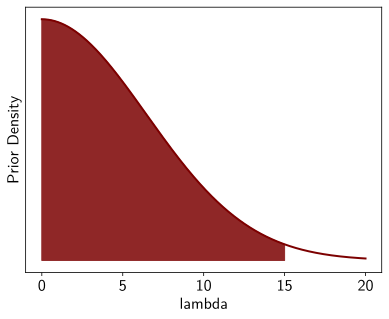

In [5]:
lbda  = np.linspace(0, 20, num=int(20/0.001))

plt.plot(lbda, stats.norm(loc=0,scale=6.44787).pdf(lbda), c=c_dark_highlight, lw=2)
plt.xlabel("lambda"); plt.ylabel("Prior Density"); plt.yticks([]);

lbda99 = np.linspace(0, 15, num=int(15/0.001))
plt.fill_between(lbda99,0.,y2=stats.norm(loc=0,scale=6.44787).pdf(lbda99),color=c_dark);

!mkdir -p ./fig/
plt.savefig("fig/prior-density-lambda.svg", bbox_inches="tight");

In [6]:
!inkscape fig/prior-density-lambda.svg --export-filename=fig/prior-density-lambda.pdf 2>/dev/null

#### Model

In this case, the candidate _complete Bayesian model_ under consideration is given by

$$
\pi( y_{1}, \ldots, y_{N}, \lambda )
=
\left[ \prod_{n = 1}^{N} \text{Poisson} (y_{n} \mid \lambda) \right]
\cdot \text{HalfNormal} (\lambda \mid 6).
$$

<div>
<center>    
<img src="https://github.com/betanalpha/knitr_case_studies/raw/master/principled_bayesian_workflow/figures/iter1/dgm/dgm.png" alt="Drawing" width="40%"/></center>
</div>

In [7]:
N = 1000
R = 500

def model(y=None):
    lbda = numpyro.sample("lbda", dist.HalfNormal(6.44787))
    return numpyro.sample("y", dist.Poisson(lbda).expand([N]), obs=y)

#### Simulation

In [8]:
trace = Predictive(model, {}, num_samples=R)(jax.random.PRNGKey(0))

In [9]:
simu_lbdas = trace['lbda']
simu_ys = trace['y']

In [10]:
print(simu_lbdas[0:9])
print(simu_lbdas.shape)

[0.3952344 8.965513  3.5787933 6.502737  0.5589886 1.4706749 1.5503553
 3.8325102 4.2442613]
(500,)


In [11]:
print(simu_ys[0:9])
print(simu_ys.shape)

[[ 1  0  0 ...  0  1  0]
 [ 7 13  4 ... 11 11 11]
 [ 1  5  6 ...  2  3  2]
 ...
 [ 0  1  3 ...  3  2  4]
 [ 6  3  4 ...  4  1  4]
 [ 4  6  3 ...  8  4  3]]
(500, 1000)


### Plot prior predictive distribution

In [12]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, simu_ys)

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=0)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

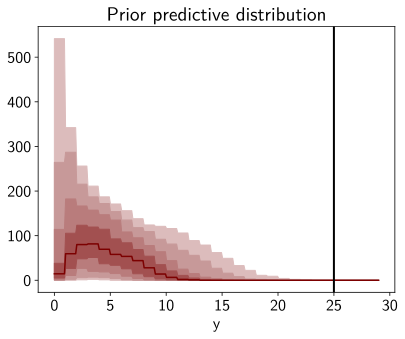

In [13]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Prior predictive distribution');

### Fit to simulated data

[Betancourt, 2020](https://betanalpha.github.io/assets/case_studies/principled_bayesian_workflow.html#Step_Nine:_Fit_Simulated_Ensemble60) performs this for each `y` in trace.

In [14]:
mcmc = MCMC(NUTS(model), num_warmup=4 * R, num_samples=R, num_chains=2)
mcmc.run(jax.random.PRNGKey(1), y=simu_ys[-1, :])
trace = mcmc.get_samples(group_by_chain=True)

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

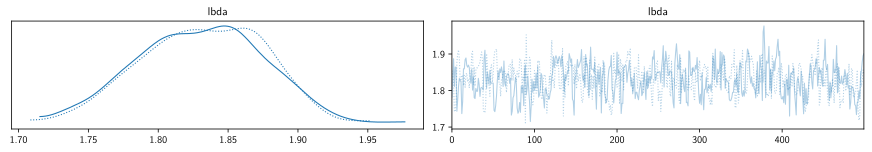

In [15]:
az.plot_trace(trace);

### Fit observations and evaluate

In [19]:
# df = pd.read_csv('data.csv')
data_ys = df[df['data']=='y']['value'].values

In [20]:
mcmc = MCMC(NUTS(model), num_warmup=4 * R, num_samples=R, num_chains=4)
mcmc.run(jax.random.PRNGKey(2), y=data_ys)
trace = mcmc.get_samples(group_by_chain=True)

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

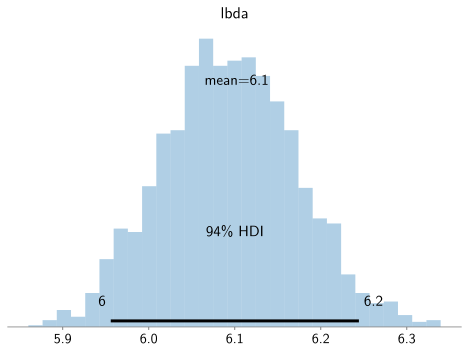

In [21]:
az.plot_posterior(trace, kind="hist");

In [22]:
ppc = Predictive(model, mcmc.get_samples())(jax.random.PRNGKey(3))

In [23]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, ppc['y'])

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=0)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

data_hist = np.histogram(data_ys,bins=bins)[0]
data_hist_interp = np.repeat(data_hist, 10)

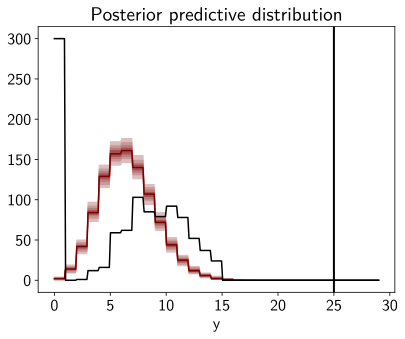

In [24]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.plot(bin_interp,data_hist_interp,color='black');
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Posterior predictive distribution');

## Accounting for measurement device failure

<!-- 4.2 -->

### Updating model specification

Recall the specification of our first attempt to model the detector count data with a [simple Poisson process model](poisson-process-for-arbitrary-detector-count-data)
```python
N = 1000
R = 500

def model(y=None):
    lbda = numpyro.sample("lbda", dist.HalfNormal(6.44787))
    return numpyro.sample("y", dist.Poisson(lbda).expand([N]), obs=y)
```
Here we adapt our likelihood to include a so-called "zero-inflated Poisson distribution" to account for the presence of many $0$ counts that may derive from malfunctioning detector devices.

In [25]:
N = 1000
R = 1000

def model2(y=None):
    theta = numpyro.sample("theta", dist.Beta(1, 1))
    lambda_ = numpyro.sample("lambda", dist.HalfNormal(6.44787))
    return numpyro.sample(
        "y", dist.ZeroInflatedPoisson(rate=lambda_, gate=1 - theta).expand([N]), obs=y)

### Simulating the updated model

In [26]:
trace = Predictive(model2, {}, num_samples=R)(jax.random.PRNGKey(0))

In [27]:
trace["theta"][:10]

DeviceArray([0.8672242 , 0.31337017, 0.5007059 , 0.5511668 , 0.38925606,
             0.67563814, 0.42280847, 0.01797002, 0.11194658, 0.9298568 ],            dtype=float32)

In [28]:
trace["lambda"][:10]

DeviceArray([ 8.611058 ,  1.9441426,  8.545718 ,  4.5276327,  8.939901 ,
              2.550708 ,  5.51275  , 12.968494 ,  3.57722  ,  7.292247 ],            dtype=float32)

In [29]:
simu_ys = trace["y"]
simu_ys

DeviceArray([[ 6, 13, 12, ..., 10, 10, 10],
             [ 3,  2,  1, ...,  3,  0,  0],
             [13,  9,  9, ...,  0,  0, 14],
             ...,
             [ 7,  0,  0, ...,  5,  0,  0],
             [ 5,  4,  0, ...,  0,  0,  0],
             [ 0,  0,  0, ...,  1,  1,  0]], dtype=int32)

What is the fraction of zero values in this simulated data?

In [30]:
simu_ys[simu_ys < 0.001].size / simu_ys.size

0.567505

In [31]:
print(simu_ys.shape)
np.count_nonzero(simu_ys, axis=1).mean()

(1000, 1000)


432.495

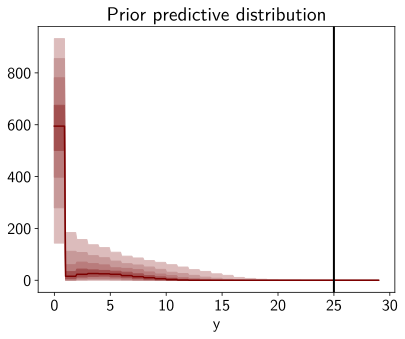

In [32]:
x_max = 30
bins = np.arange(0 ,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)

hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, simu_ys)

prctiles = np.percentile(hists,np.linspace(10, 90,num=9),axis=0)
prctiles_interp = np.repeat(prctiles, 10,axis=1)


for i, color in enumerate([c_light, c_light_highlight, c_mid, c_mid_highlight]):
    plt.fill_between(bin_interp, prctiles_interp[i, :],
                     prctiles_interp[-1 - i, :],
                     alpha = 1.0,
                     color = color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Prior predictive distribution');

In [33]:
simu_ys[simu_ys > 25].size / simu_ys.size

0.000294

### Fit Simulated Observations and Evaluate 

In [34]:
N = 1000
R = 1000

mcmc = MCMC(NUTS(model2), num_warmup=R, num_samples=R, num_chains=2)
mcmc.run(jax.random.PRNGKey(1), y=simu_ys[-1, :])
trace_fit = mcmc.get_samples(group_by_chain=True)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

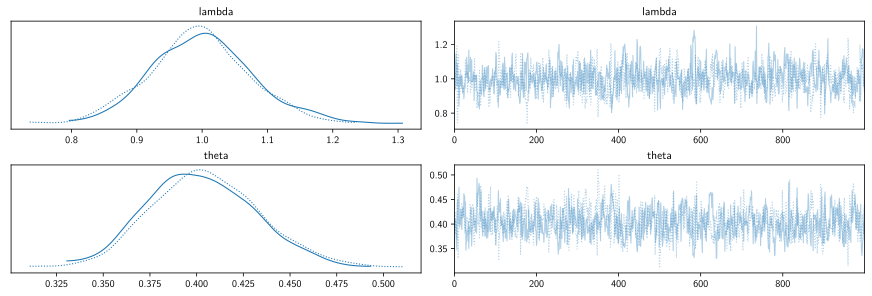

In [35]:
az.plot_trace(trace_fit);

In [36]:
numpyro.diagnostics.print_summary(trace_fit)


                mean       std    median      5.0%     95.0%     n_eff     r_hat
    lambda      1.00      0.08      1.00      0.86      1.12    639.10      1.00
     theta      0.40      0.03      0.40      0.36      0.45    651.82      1.01



In [37]:
import pickle
with open("fit_data2.pkl", "wb+") as buffer:
    pickle.dump({"model": model2, "trace": trace_fit}, buffer)

# Section 4.3

## Build a generative model

Build a model that generates zero-inflated Poisson counts. For reference, the model from the second attempt is
```python
N = 1000
R = 1000

def model2(y=None):
    lambda_ = numpyro.sample("lambda", dist.HalfNormal(6.44787))
    theta = numpyro.sample("theta", dist.Beta(1, 1))
    return numpyro.sample(
        "y", dist.ZeroInflatedPoisson(rate=lambda_, gate=1 - theta).expand([N]), obs=y)
```

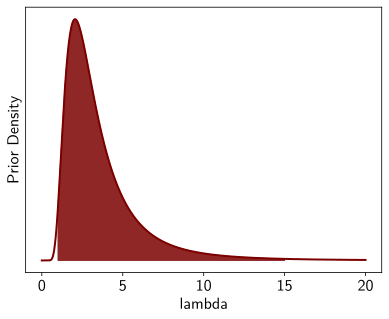

In [38]:
lbda  = np.linspace(0, 20, num=int(20/0.001))
pdf = stats.invgamma(3.48681,scale=9.21604)
plt.plot(lbda, pdf.pdf(lbda), c=c_dark_highlight, lw=2)
plt.xlabel("lambda"); plt.ylabel("Prior Density"); plt.yticks([]);

lbda99 = np.linspace(1, 15, num=int(15/0.001))

plt.fill_between(lbda99,0.,y2=pdf.pdf(lbda99),color=c_dark);

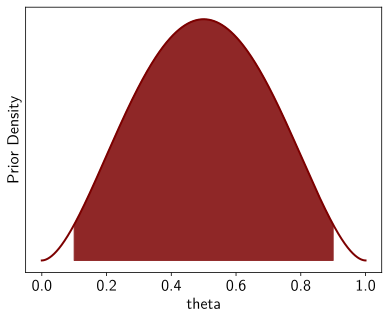

In [39]:
theta  = np.linspace(0, 1, num=int(1/0.001))
pdf = stats.beta(2.8663,2.8663)
plt.plot(theta, pdf.pdf(theta), c=c_dark_highlight, lw=2)
plt.xlabel("theta"); plt.ylabel("Prior Density"); plt.yticks([]);

theta99 = np.linspace(0.1, 0.9, num=int(0.8/0.001))

plt.fill_between(theta99,0.,y2=pdf.pdf(theta99),color=c_dark);

In [40]:
#WORKING

N = 1000
R = 1000

def model3(y=None):
    lbda = numpyro.sample("lbda", dist.InverseGamma(3.48681, 9.21604))
    theta = numpyro.sample("theta", dist.Beta(2.8663, 2.8663))  
    return numpyro.sample(
        "y", dist.ZeroInflatedPoisson(rate=lbda, gate=1 - theta).expand([N]), obs=y)

In [41]:
trace = Predictive(model3, {}, num_samples=R)(jax.random.PRNGKey(0))

In [42]:
simu_lbdas = trace['lbda']
simu_thetas = trace['theta']
simu_ys = trace['y']

## Plot prior predictive distribution

In [43]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, simu_ys)

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=0)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

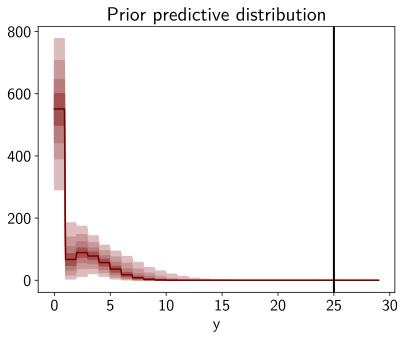

In [44]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Prior predictive distribution');

## Fit to simulated data

In the example, Betancourt performs this for each `y` in trace. Here we only compute this for one element of the trace.

In [45]:
N = 1000
R = 1000

mcmc = MCMC(NUTS(model3), num_warmup=4 * R, num_samples=R, num_chains=2)
mcmc.run(jax.random.PRNGKey(1), y=simu_ys[:, -1])
trace = mcmc.get_samples(group_by_chain=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

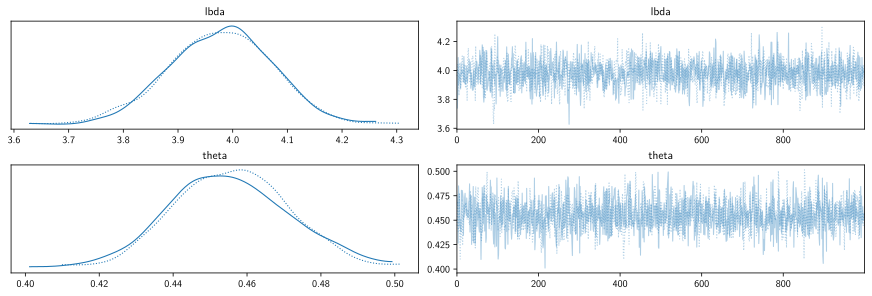

In [46]:
az.plot_trace(trace);

## Fit observations and evaluate

In [50]:
# df = pd.read_csv('data.csv')
data_ys = df[df['data']=='y']['value'].values

In [51]:
mcmc = MCMC(NUTS(model3), num_warmup=4 * R, num_samples=R, num_chains=4)
mcmc.run(jax.random.PRNGKey(2), y=data_ys)
trace = mcmc.get_samples(group_by_chain=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

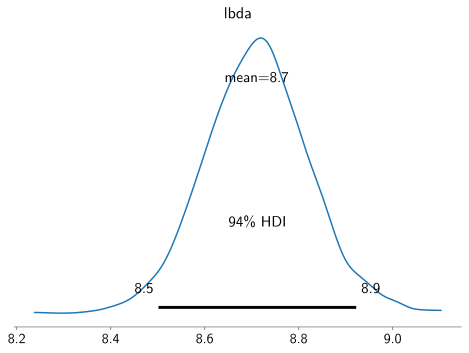

In [52]:
az.plot_posterior(trace, var_names="lbda");

In [53]:
ppc = Predictive(model3, mcmc.get_samples())(jax.random.PRNGKey(3))

In [54]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, ppc['y'])

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=0)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

data_hist = np.histogram(data_ys,bins=bins)[0]
data_hist_interp = np.repeat(data_hist, 10)

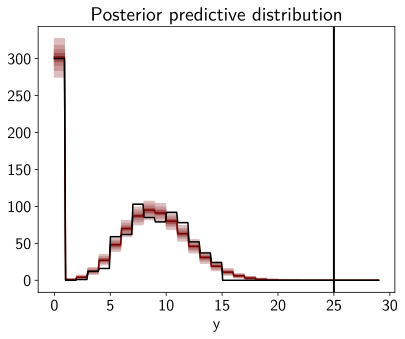

In [55]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.plot(bin_interp,data_hist_interp,color='black');
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Posterior predictive distribution');

# Section 4.4

In the third attempt, we identified the missing component of our prior was an upper threshold beyond which detectors were unable to register counts. Our model was
```python
#WORKING

N = 1000
R = 1000

def model3(y=None):
    lbda = numpyro.sample("lbda", dist.InverseGamma(3.48681, 9.21604))
    theta = numpyro.sample("theta", dist.Beta(2.8663, 2.8663))  
    return numpyro.sample(
        "y", dist.ZeroInflatedPoisson(rate=lbda, gate=1 - theta).expand([N]), obs=y)
```
Now, we implement a means of truncating the zero-inflated Poisson distribution to reflect this newly identified information.

In [56]:
def rv_truncated_poisson(mu, mx, size=None):
    mu = np.asarray(mu)
    mx = np.asarray(mx)
    dist = stats.distributions.poisson(mu)

    lower_cdf = 0.
    upper_cdf = dist.cdf(mx)
    nrm = upper_cdf - lower_cdf
    sample = np.random.random(size) * nrm + lower_cdf

    return dist.ppf(sample)


def rv_truncated_zip(args):
    rate, gate, high, shape = args
    g = rv_truncated_poisson(rate, high, size=shape)
    return g * (np.random.random(shape) > gate)


class TruncatedZeroInflatedPoisson(dist.Distribution):

    def __init__(self, rate, gate, high, validate_args=None):
        self.rate, self.gate, self.high = rate, gate, high
        batch_shape = jax.lax.broadcast_shapes(
            jnp.shape(rate), jnp.shape(gate), jnp.shape(high))
        super().__init__(batch_shape, validate_args=None)

    def sample(self, key, sample_shape=()):
        shape = sample_shape + self.batch_shape
        samples = jax.experimental.host_callback.call(
            rv_truncated_zip, (self.rate, self.gate, self.high, shape),
            result_shape=jax.ShapeDtypeStruct(shape, jnp.result_type(float)))
        return samples.astype(jnp.result_type(int))

    def log_prob(self, value):
        upper_cdf = jax.scipy.special.gammaincc(self.high + 1, self.rate)
        log_prob = dist.Poisson(self.rate).log_prob(value) - jnp.log(upper_cdf)
        log_prob = jnp.log1p(-self.gate) + log_prob
        return jnp.where(value == 0, jnp.log(self.gate + jnp.exp(log_prob)), log_prob)

In [57]:
N = 1000
R = 1000

def model4(y=None):
    lbda = numpyro.sample("lbda", dist.InverseGamma(3.48681, 9.21604))
    psi = numpyro.sample("psi", dist.Beta(2.8663, 2.8663))  
    return numpyro.sample(
        "y",
        TruncatedZeroInflatedPoisson(rate=lbda, gate=1 - psi, high=14).expand([N]),
        obs=y)

In [58]:
trace = Predictive(model4, {}, num_samples=1000)(jax.random.PRNGKey(0))

In [59]:
simu_lbdas = trace['lbda']
simu_thetas = trace['psi']
simu_ys = trace['y']

In [60]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, simu_ys)

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=0)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

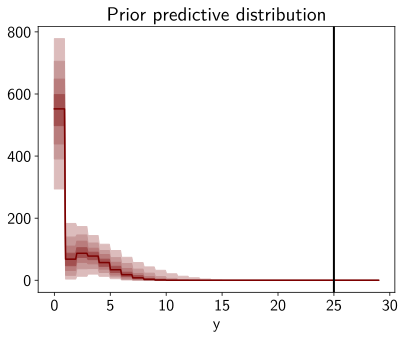

In [61]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Prior predictive distribution');

In [62]:
N = 1000
R = 1000

mcmc = MCMC(NUTS(model4), num_warmup=4 * R, num_samples=R, num_chains=4)
mcmc.run(jax.random.PRNGKey(1), y=data_ys)
trace = mcmc.get_samples(group_by_chain=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

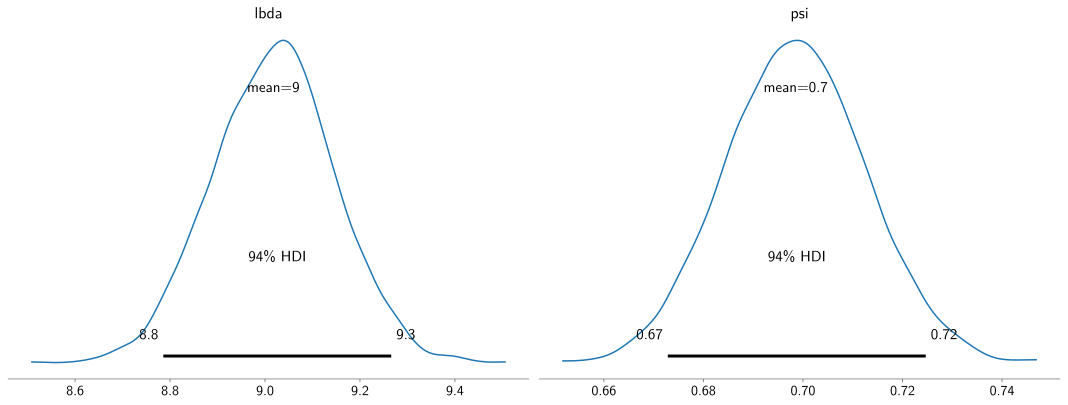

In [63]:
az.plot_posterior(trace);

In [64]:
ppc = Predictive(model4, mcmc.get_samples())(jax.random.PRNGKey(2))

In [65]:
x_max = 30
bins = np.arange(0,x_max)
bin_interp = np.linspace(0,x_max-1,num=(x_max-1)*10)
hists = np.apply_along_axis(lambda a: np.histogram(a, bins=bins)[0], 1, ppc['y'])

prctiles = np.percentile(hists,np.linspace(10,90,num=9),axis=0)
prctiles_interp = np.repeat(prctiles, 10,axis=1)

data_hist = np.histogram(data_ys,bins=bins)[0]
data_hist_interp = np.repeat(data_hist, 10)

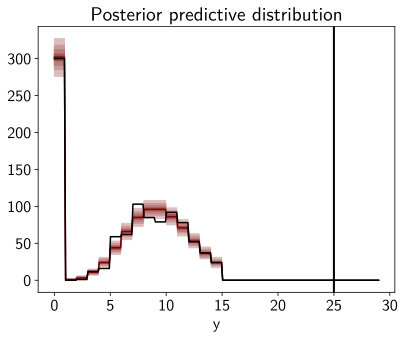

In [66]:
for i,color in enumerate([c_light,c_light_highlight,c_mid,c_mid_highlight]):
    plt.fill_between(bin_interp,prctiles_interp[i,:],prctiles_interp[-1-i,:],alpha=1.0,color=color);


plt.plot(bin_interp,prctiles_interp[4,:],color=c_dark_highlight);
plt.plot(bin_interp,data_hist_interp,color='black');
plt.axvline(x=25,ls='-',lw=2,color='k');
plt.xlabel('y');
plt.title('Posterior predictive distribution');